In [1]:
from mpgm.mpgm.evaluation.generating_samples import *
from mpgm.mpgm.evaluation.evaluation_metrics import EvalMetrics
import matplotlib.pyplot as plt
import numpy as np
import time

In [37]:
from mpgm.mpgm.model_fitters.prox_grad_fitters import Prox_Grad_Fitter, Constrained_Prox_Grad_Fitter
from mpgm.mpgm.evaluation.evaluation_metrics import *

from mpgm.mpgm.sample_generation.samplers import *

from mpgm.mpgm.evaluation.preprocessing import ClampMax

import numpy as np
import matplotlib.pyplot as plt


samples_file_name = "../samples.sqlite"
fit_file_name = "../fit_models.sqlite"
nr_variables = 10
nr_samples = 150
alpha = 0.5

# SGW = SampleParamsWrapper(nr_variables=nr_variables,
#                           sample_init=np.zeros((nr_variables, )),
#                           nr_samples=nr_samples,
#                           random_seed=1)

# SGW.graph_generator = LatticeGraphGenerator(sparsity_level=0)
# SGW.weight_assigner = Constant_Weight_Assigner(ct_weight=0.1)
# # SGW.weight_assigner = Dummy_Weight_Assigner()
# SGW.model = TPGM(R=10)
# # SGW.model = Model(theta=np.zeros((nr_samples, nr_variables)))
# SGW.sampler = TPGMGibbsSampler(burn_in=200, thinning_nr=150)
# # SGW.sampler = SIPRVSampler(lambda_true=1, lambda_noise=0.5)
# SGW.generate_samples_and_save("SPGM_debug", samples_file_name)

samples_id = "SPGM_debug"
FPW = FitParamsWrapper(random_seed=0,
                       samples_file_name=samples_file_name)
FPW.model = SPGM(R=10, R0=5)

FPW.fitter = Constrained_Prox_Grad_Fitter(alpha=0.5,
                                          constraint_solver='osqp',
                                          save_regularization_paths=True,
                                          init_step_size=0.1,
                                          early_stop_criterion='likelihood')

FPW.preprocessor = ClampMax(10)

theta_init = np.random.normal(0, 0.1, (nr_variables, nr_variables))
theta_fit = FPW.fit_model_and_save(fit_id="SPGM_debug",
                                   fit_file_name=fit_file_name,
                                   parallelize=False,
                                   samples_file_name=samples_file_name,
                                   samples_id="SPGM_debug",
                                   theta_init=theta_init)

regularization_paths = FPW.FPS.regularization_paths

/home/mcio/miniconda3/envs/mpgm/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/home/mcio/miniconda3/envs/mpgm/lib/python3.8/site-packages/qpsolvers/osqp_.py:101: UserWarning: Converted P to scipy.sparse.csc.csc_matrix
For best performance, build P as a csc_matrix rather than as a numpy.ndarray
  warn(conversion_warning("P"))
/home/mcio/miniconda3/envs/mpgm/lib/python3.8/site-packages/qpsolvers/osqp_.py:122: UserWarning: Converted G to scipy.sparse.csc.csc_matrix
For best performance, build G as a csc_matrix rather than as a numpy.ndarray
  warn(conversion_warning("G"))


/home/mcio/miniconda3/envs/mpgm/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


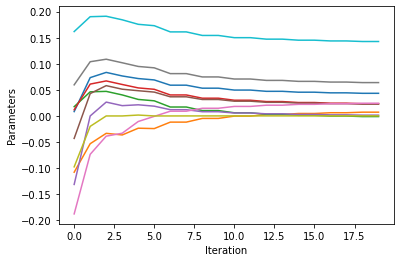

[[ 1.00041221e-01  1.62019371e-02  2.21345267e-02  3.11014358e-02
   4.56762381e-02  1.10828416e-01  5.51471011e-02  4.27748545e-02
  -5.00469181e-02 -4.22786936e-02]
 [ 4.43221734e-02  6.17323910e-03 -1.55824766e-04  2.44400753e-02
   2.14020114e-03  2.35584269e-02  2.34617663e-02  6.49674386e-02
   1.56932628e-04  1.43812536e-01]
 [-5.15276126e-03  4.06247168e-02  1.73302804e-02  7.01425338e-02
   1.41272970e-01  1.13889655e-01 -5.56536821e-03  3.34942369e-02
   9.00308937e-02  1.72634782e-05]
 [ 3.45665329e-02 -1.09696762e-01  1.96512181e-01  1.49948458e-01
   7.04933364e-02  3.21528049e-02  7.11947739e-02  1.07804309e-01
  -7.42454932e-02 -9.34795378e-03]
 [-1.78901396e-02  1.67572673e-02  5.85788229e-03  8.62192263e-02
   1.89919495e-03  1.00927175e-01  1.53604200e-03  1.96440640e-04
   6.09457152e-03  7.99712818e-02]
 [ 1.32352816e-01  2.47546251e-04  2.22210722e-02  2.46100739e-02
  -3.22092793e-04  8.25281713e-03  2.39791233e-04  1.92752902e-02
   7.03014015e-02  5.36090564e-03

In [39]:
node = 1
x = list(range(len(regularization_paths[node])))
for param in range(nr_variables):
    plt.plot(x, regularization_paths[node][:, param])
plt.xlabel('Iteration')
plt.ylabel('Parameters')
plt.savefig('reg_paths_likelihoods.png')
plt.show()

print(theta_fit)

/home/mcio/miniconda3/envs/mpgm/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


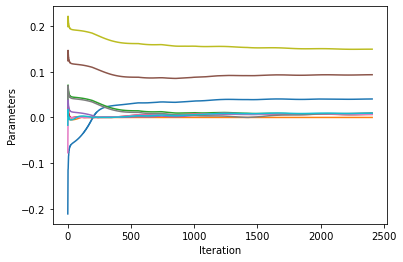

[[-5.33904436e-29  1.50398889e-01  9.21253435e-03  2.64970968e-02
   1.48606745e-02  7.17079073e-03  9.79347766e-03  9.31095748e-03
   9.68102377e-02  9.88140675e-03]
 [ 4.04413858e-02 -1.34879653e-27  6.90839206e-03  6.70398241e-03
   8.13702152e-03  9.35901746e-02  6.97121768e-03  9.98283792e-03
   1.49483986e-01  9.42537552e-03]
 [ 4.57156226e-03  4.25154660e-02 -7.76782517e-29  1.01753872e-01
   1.54586754e-01  3.84527450e-02  2.80314660e-02  4.77359837e-02
   2.13749295e-02  2.01119056e-02]
 [ 3.87594553e-02  4.63934802e-02  3.99759683e-02 -1.68638508e-05
   1.17313145e-01  2.04440123e-02  9.03098342e-02  2.30925231e-02
   2.81569438e-02  7.83880193e-03]
 [ 5.95042434e-02  2.13329612e-03  7.28044092e-03  1.85966226e-03
  -8.79359403e-29  8.32277479e-02  7.11316110e-03  7.47152973e-02
   8.48315557e-03  4.60407445e-02]
 [ 4.40128018e-02  8.60940631e-02  6.36714135e-03  8.01633303e-02
   1.50563071e-02 -4.93664856e-29  6.31427376e-03  4.33937654e-02
   3.02969864e-02  1.30002949e-02

In [36]:
node = 1
x = list(range(len(regularization_paths[node])))
for param in range(nr_variables):
    plt.plot(x, regularization_paths[node][:, param])
plt.xlabel('Iteration')
plt.ylabel('Parameters')
plt.savefig('reg_paths_parameters.png')
plt.show()


print(theta_fit)

/home/mcio/miniconda3/envs/mpgm/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


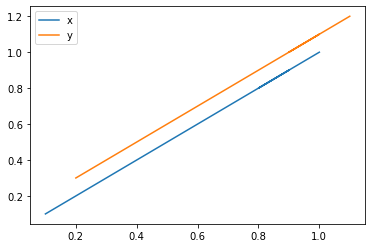

In [20]:
x = np.array([1, 0.8, 0.9, 0.7, 0.6, 0.5, 0.4, 0.3, 0.2, 0.1])
y = np.array([1, 0.8, 0.9, 0.7, 0.6, 0.5, 0.4, 0.3, 0.2, 0.1])
x2 = x + 0.1
y2 = y + 0.2
plt.plot(x, y, label='x')
plt.plot(x2, y2, label='y')
plt.legend()
plt.show()

In [9]:
class Boo():
    def f(self, a, b, c):
        d = dict(**locals())
        del d['self']
        print(d)

In [10]:
b = Boo()
b.f(1,2,3)

{'a': 1, 'b': 2, 'c': 3}


In [11]:
'_'.join(['animal1', 'animal2'])

'animal1_animal2'

In [20]:
def generate_experiment_name(model:str,
                             graph_type:str,
                             sample_gen_method:str,
                             experiment_shorthand:str,
                             early_stop_method:str,
                             *args) -> str:
    function_args = [model, graph_type, sample_gen_method, experiment_shorthand, early_stop_method] + list(args)
    return '_'.join(function_args)

In [21]:
generate_experiment_name('TPGM', 'lattice', 'SIPRV', 'vary_alpha', 'weight', 'sadge')

'TPGM_lattice_SIPRV_vary_alpha_weight_sadge'